# Tarea 4 Física computacional: Cálculo

La tercera tarea la omití (era sobre bases de datos). 

## Diferenciales numéricas y cálculo simbólico:

1. **Fácil**. Escribe el desarrollo de Taylor de la función $f$ al rededor de $x$ hasta orden 4 para variaciones $\Delta x$, $1.5 \Delta x$, $2 \Delta x$, $2.5 \Delta x$ y $3 \Delta x$. Multiplica cada desarrollo por un coeficiente diferente $A_1$, $A_{1.5}$, $A_2$, $A_{2.5}$ y $A_3$ y suma los 5 desarrollos. Haciendo 0 los coeficientes de que multiplican $f(x)$, $f'(x)$, $f''(x)$ y $f^{(3)}(x)$ y 1 el que multiplica a $f^{(4)}(x)$, obtén un sistema de ecuaciones lineales para los valores de $A_1$, $A_{1.5}$, $A_2$, $A_{2.5}$ y $A_3$. Finalmente resolviendo ese sistema de ecuaciones obtén una fórmula para $f^{(4)}(x)$ (usa fracciones como 3//5 en vez de 1.5). Prueba tu fórmula con sin(x). ¿Qué tal funciona? Grafica sin(x) y su cuarta diferencial. 

Solución:

El desarrollo queda como:

$$f(x + \Delta x) = f(x) + \Delta x f'(x) + \frac{\Delta x^2}{2}f''(x) + \frac{\Delta x^3}{6} f^{(3)}(x)+\frac{\Delta x^4}{24} f^{(4)}(x)$$

$$f(x + \frac{3}{2}\Delta x) = f(x) + \frac{3}{2}\Delta x f'(x) + \frac{9}{4}\frac{\Delta x^2}{2}f''(x) + \frac{27}{8}\frac{\Delta x^3}{6} f^{(3)}(x)+\frac{81}{16}\frac{\Delta x^4}{24} f^{(4)}(x)$$

$$f(x + 2\Delta x) = f(x) + 2\Delta x f'(x) + 4\frac{\Delta x^2}{2}f''(x) + 8\frac{\Delta x^3}{6} f^{(3)}(x)+16\frac{\Delta x^4}{24} f^{(4)}(x)$$

$$f(x + \frac{5}{2}\Delta x) = f(x) + \frac{5}{2}\Delta x f'(x) + \frac{25}{4}\frac{\Delta x^2}{2}f''(x) + \frac{125}{8}\frac{\Delta x^3}{6} f^{(3)}(x)+\frac{625}{16}\frac{\Delta x^4}{24} f^{(4)}(x)$$

$$f(x + 3\Delta x) = f(x) + 3\Delta x f'(x) + 9\frac{\Delta x^2}{2}f''(x) + 27\frac{\Delta x^3}{6} f^{(3)}(x)+81\frac{\Delta x^4}{24} f^{(4)}(x)$$

Luego, multiplicando por A,B,C,D,E cada ecuación (en ese orden), y sumando, obtenemos:

$$Af(x + \Delta x) + Bf(x + \frac{3}{2}\Delta x)+Cf(x + 2\Delta x)+Df(x + \frac{5}{2}\Delta x)+Ef(x + 3\Delta x)=[A+B+C+D+E] f(x) + \left[A+\frac{3}{2}B+2C+\frac{5}{2}D+3E\right]\Delta x f'(x)+\left[A+\frac{9}{4}B+4C+\frac{25}{4}D+9E\right]\frac{\Delta x^2}{2} f''(x)+\left[A+\frac{27}{4}B+8C+\frac{125}{8}D+27E\right]\frac{\Delta x^3}{6} f'''(x)+\left[A+\frac{81}{16}B+16C+\frac{625}{16}D+81E\right]\frac{\Delta x^4}{24} f^{(4)}(x)$$

Obtenemos el sistema 
$$ A+             B+  C+              D+  E = 0$$
$$ A+\frac{3}{2}  B+2 C+\frac{5}{2}   D+3 E = 0$$
$$ A+\frac{9}{4}  B+4 C+\frac{25}{4}  D+9 E = 0$$
$$ A+\frac{27}{4} B+8 C+\frac{125}{8} D+27E = 0$$
$$ A+\frac{81}{16}B+16C+\frac{625}{16}D+81E = 24$$

Resolvemos:

In [3]:
using LinearAlgebra
A = [1//1   1//1   1//1   1//1    1//1 ;
     1//1   3//2   2//1   5//2    3//1 ;
     1//1   9//4   4//1   25//4   9//1 ;
     1//1   27//8  8//1   125//8  27//1;
     1//1   81//16 16//1  625//16 81//1]

x = [0//1;0//1;0//1;0//1;24//1]
y = [0//1;1//1;0//1;0//1;0//1]

coef4 = A\x

5-element Array{Rational{Int64},1}:
  16//1
 -64//1
  96//1
 -64//1
  16//1

Esto significa que 
$$f^{(4)}(x) = \left[16f(x + \Delta x) -64f(x + \frac{3}{2}\Delta x)+96f(x + 2\Delta x)--64f(x + \frac{5}{2}\Delta x)+16f(x + 3\Delta x)\right]/\Delta x^4$$

In [43]:
#tenemos que los valores de los coeficientes son A = 2/3; B = -8/3; C =4; D = -8/3; E=2/3  
a = [1//1,3//2,2//1,5//2,3//1] #fraciones de los pasos alrededor de x que se consideraron
#Ahora, la función:
d⁴(f, t; Δx = big(1e-10)) =sum([coef4[i]*f(t+a[i]*Δx) for i in 1:5])/(Δx^4) 

d⁴ (generic function with 1 method)

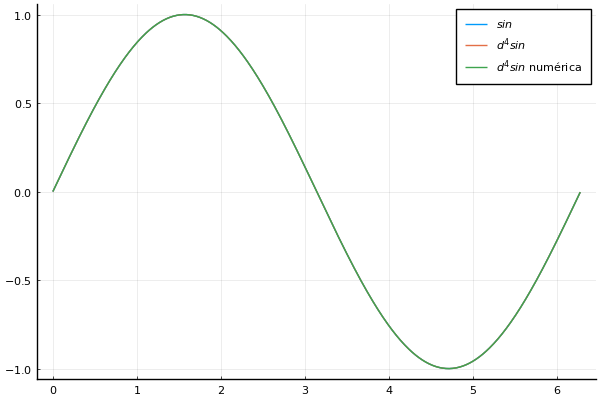

In [44]:
#probamos la función
using Plots, LaTeXStrings
pyplot()

f(x) = sin(x)
fd4(x) = sin(x) #4ta derivada de f(x) analítica

fd4num(x)=d⁴(f,x)
x = 0:0.01:2π
plot(x, f.(x), label = L"sin")
plot!(x, fd4.(x), label = L"d^4 sin")
plot!(x, fd4num.(x),label = L"$d^4 sin$ numérica")


Observamos que el error es muy bajo. haciendo la resta, tenemos en el punto $x=\pi$ que $|fd4(x)-fd4num(x)|\approx2$x$10^{-8}$, es decir, del orden del paso $\Delta x$

In [45]:
x₀=3.1415926535
abs(fd4(x₀)-fd4num(x₀))

2.000000000000000131677477974456267401639737415109512211077840908885081182707334e-10

2. **Dificultad media**. El proceso anterior lo puedes generalizar dados los coeficientes que multiplican a $\Delta x$. Haz una función que tenga como argumentos esos coeficientes, el grado de derivada que se quiere calcular y arroje los valores de las constantes $A_r$. Haz además una función que dadas las constantes $A_r$ y los coeficientes que multiplican a $\Delta x$, genere una función que calcule la correspondiente derivada. 

Nota: En este ejercicio NO puedes usar SymPy! 

In [46]:
p = [1//2 -1//2 1//1 -1//1]
length(p)

4

In [47]:
#Esta es la función que calcula los coeficientes. Es necesario que los coeficientes de Δx sean 
# almenos tantos como el grado de la derivada + 1
function Constantes(Coef::Array{Rational{Int64}},n::Int64) #los coeficientes deben ser racionales 
    k = length(Coef)
    if k>=n+1
        b = [0//1 for i in 1:k]  #generamos el vector de términos independientes
        b[n+1] = factorial(n)//1           #sólo el n+1-esimo valor debe ser igual al factorial de n, el resto es 0
        b = b
        A = [ (Coef[j])^i for i in 0:k-1,j in 1:k ] #Generamos una matriz con las potencias de los coeficientes
        #print(A)
        coeficientes = A^(-1)*b #resolvemos el sistema
        #print(coeficientes)
        return coeficientes
    else
       println("Los coeficientes de Δx deben ser almenos ",n+1)
        return 0
    end
end

Constantes (generic function with 1 method)

In [48]:
#Esta es la función derivada

function d(f,t;Δx = big(1e-10),n::Int64=1,coeficientes::Array{Rational{Int64}} = [-1//1 1//1 2//1 -2//1])
        constantes = Constantes(coeficientes,n)
        return sum([constantes[i]*f(t+coeficientes[i]*Δx) for i in 1:length(coeficientes)])/(Δx^n) 
    end 


d (generic function with 1 method)

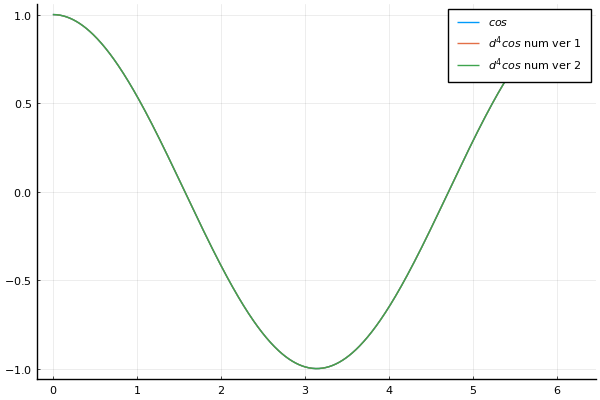

In [49]:
#Verivicaremos que funciona comparando con la función de la 4ta derivada del anterior 
f(x) = cos(x)
d4_1(x) = d⁴(f,x)
d4_2(x) = d(f,x,n=4,coeficientes=[1//1 3//2 2//1 5//2 3//1]) #usamos los mismo coeficientes

x = 0:0.01:2π
plot(x, f.(x), label = L"cos")
plot!(x, d4_1.(x), label = L"$d^4 cos$ num ver 1")
plot!(x, d4_2.(x),label = L"$d^4 cos$ num ver 2") #esta es la nueva 
#en teoría, la forma de calcular ambas es igual, por lo que el resultado debería ser el mismo 

Vemos que coincide perfectamente 

In [50]:
abs(d4_1(3.141592/2)-d4_2(3.141592/2))

0.0

3. **Dificultad media**. Revisa cómo varía el error en la **primera** diferencial numérica (usando la versión simple del curso dos veces y un par más que produzcas con tu función del ejercicio 2) de las funciones $sin(x)$, $x^2$, $1/x$ y $tan(1/x)$ para varios valores de $x$ y como función de $\Delta x$ (lo que en el video puse como $\Delta t$). Para esto primero obtén analíticamente las derivadas de estas funciones (llamémosle genéricamente $f$ a la función, $f'$ a su derivada y $\frac{\Delta f}{\Delta x}$ a su diferencial numérica). Grafica $\frac{\Delta f(x)}{\Delta x}- f'(x)$ contra $\Delta x$. Conviene graficar en escala logarítimica, así que los valores de $\Delta x$ deben ir variando exponencialmente, por ejemplo, cada nuevo valor de $\Delta x$ que sea $\Delta x_n = 2 \Delta x_{n-1}$ comenzando con $\Delta x_0 = 10^{-10}$. Discute un **poco** tus resultados.

Nota: Recuerda que en $\Delta x$ la derivada numérica tiende a NaN. 

Nota2: Usa SymPy para obtener las derivadas simbólicas (analíticamente) de las funciones. 

In [51]:
#la funcion primera derivada del curso es 
d_curso(f, x; Δx = big(1e-10)) = (f(x+Δx)-f(x))/Δx 

d_curso (generic function with 1 method)

In [52]:
#Vamos a obtener la derivada de las funciones dadas:
using SymPy
@vars w
[diff(sin(w),w),diff(w^2,w),diff(1/w,w),diff(tan(1/w),w)]

4-element Array{Sym,1}:
                cos(w)
                   2⋅w
                -1/w^2
 -(tan(1/w)^2 + 1)/w^2

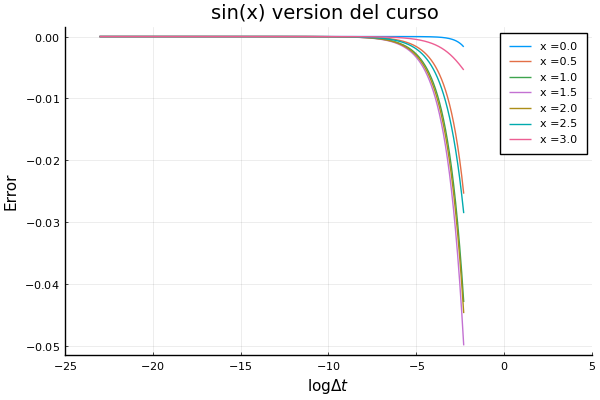

In [53]:
#ahora, procedemos con las gráficas
##### sin(x) ####
Δt = [Float64(10^(-i)) for i in 1:0.01:10]
plot(xlim = (-25,5))
for x in 0:0.5:3
    ErrSin(Δt) = d_curso(sin,x,Δx=Δt)-cos(x) #usamos la versión del curso 
    plot!(log.(Δt),ErrSin.(Δt), label = "x =$x")
end 
plot!(xlabel = L"\log{\Delta t}",ylabel="Error",title = "sin(x) version del curso ")


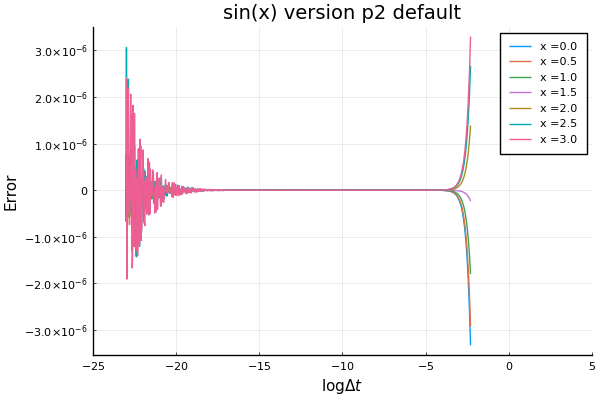

In [54]:
plot(xlim = (-25,5))
for x in 0:0.5:3
    ErrSin(Δt) = d(sin,x,Δx=Δt)-cos(x) #usamos la versión del problema 2 con coeficientes default (ver función)
    plot!(log.(Δt),ErrSin.(Δt), label = "x =$x")
end 
plot!(xlabel = L"\log{\Delta t}",ylabel="Error",title = "sin(x) version p2 default")


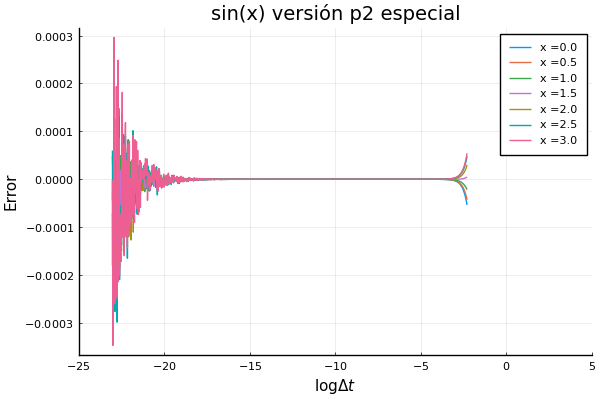

In [55]:
plot(xlim = (-25,5))
for x in 0:0.5:3
    ErrSin(Δt) = d(sin,x,Δx=Δt,coeficientes = [1//1 3//2 2//1 5//2 3//1])-cos(x) #usamos la versión del problema 2 
                                                                                 #con coeficientes del problema 1
    plot!(log.(Δt),ErrSin.(Δt), label = "x =$x")
end 
plot!(xlabel = L"\log{\Delta t}",ylabel="Error",title="sin(x) versión p2 especial")


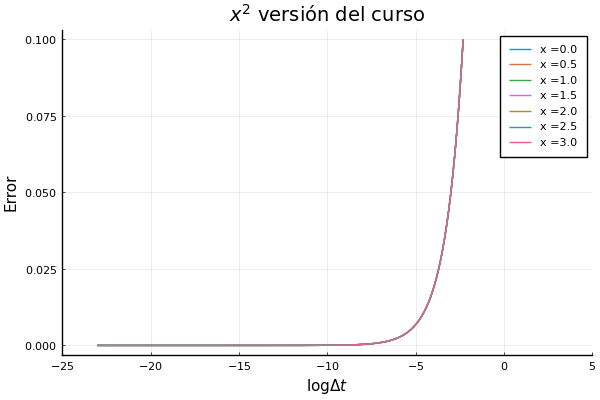

In [56]:
###################### x^2 #######################
Δt = [Float64(10^(-i)) for i in 1:0.01:10]
plot(xlim = (-25,5))
for x in 0:0.5:3
    f(x) = x^2
    ErrX²(Δt) = d_curso(f,x,Δx=Δt)-2*x #usamos la versión del curso 
    plot!(log.(Δt),ErrX².(Δt), label = "x =$x")
end 
plot!(xlabel = L"\log{\Delta t}",ylabel="Error", title = L"$x^2$ versión del curso")

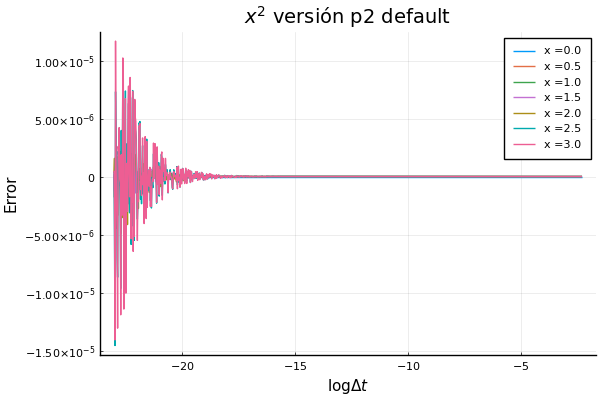

In [57]:
plot()
for x in 0:0.5:3
    f(x) = x^2
    ErrX²(Δt) = d(f,x,Δx=Δt)-2*x #usamos la versión del problema 2 con coeficientes default 
    plot!(log.(Δt),ErrX².(Δt), label = "x =$x")
end 
plot!(xlabel = L"\log{\Delta t}",ylabel="Error",title = L"$x^2$ versión p2 default")

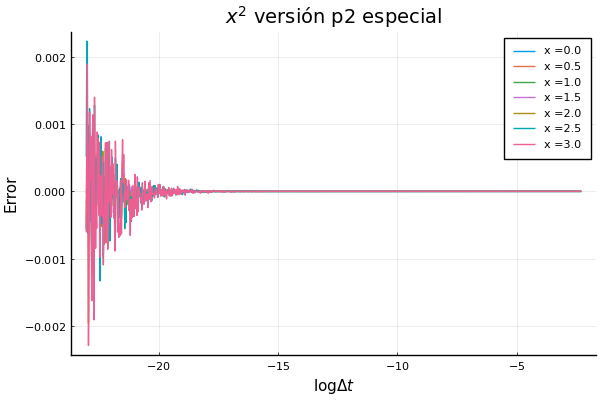

In [58]:
plot()
for x in 0:0.5:3
    f(x) = x^2
    ErrX²(Δt) = d(f,x,Δx=Δt,coeficientes = [1//1 3//2 2//1 5//2 3//1])-2*x #usamos la versión del problema 2 
                                                                           #con coeficientes del problema 1 
    plot!(log.(Δt),ErrX².(Δt), label = "x =$x")
end 
plot!(xlabel = L"\log{\Delta t}",ylabel="Error",title=L"$x^2$ versión p2 especial")

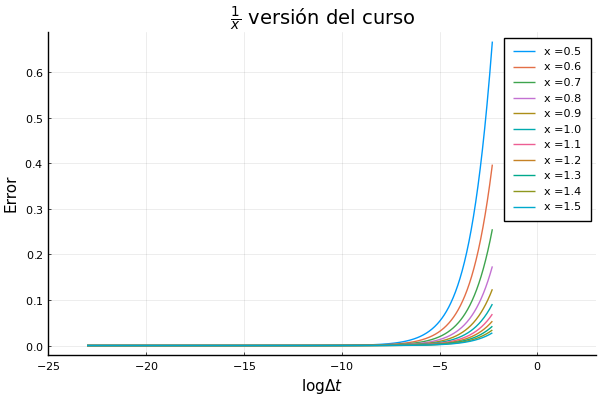

In [59]:
################### 1/x ##################
Δt = [Float64(10^(-i)) for i in 1:0.01:10]
plot(xlim = (-25,3))
for x in 0.5:0.1:1.5
    f(x) = 1/x
    ErrXinv(Δt) = d_curso(f,x,Δx=Δt)-(-x^(-2)) #usamos la versión del curso
    plot!(log.(Δt),ErrXinv.(Δt), label = "x =$x")
end 
plot!(xlabel = L"\log{\Delta t}",ylabel="Error",title=L"$\frac{1}{x}$ versión del curso")

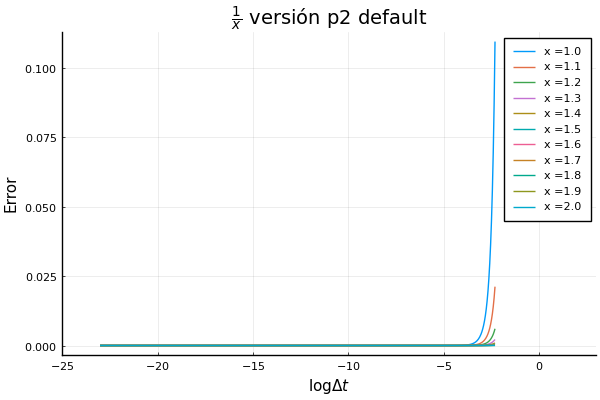

In [60]:
plot(xlim = (-25,3))
for x in 1:0.1:2
    f(x) = tan(1/x)
    ErrXinv(Δt) = d(f,x,Δx=Δt)-(-(tan(1/x)^2+1)*x^(-2)) 
                            #usamos la versión del problema 2 con coeficientes del problema 1
    plot!(log.(Δt),ErrXinv.(Δt), label = "x =$x")
end 
plot!(xlabel = L"\log{\Delta t}",ylabel="Error", title = L"$\frac{1}{x}$ versión p2 default")

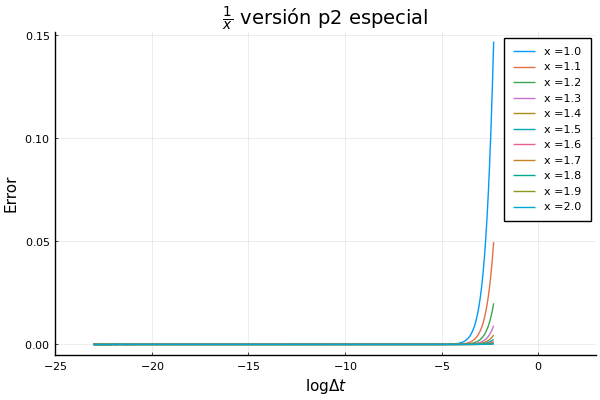

In [61]:
plot(xlim = (-25,3))
for x in 1:0.1:2
    f(x) = tan(1/x)
    ErrXinv(Δt) = d(f,x,Δx=Δt,coeficientes = [1//1,3//2,2//1,5//2,3//1])-(-(tan(1/x)^2+1)*x^(-2)) 
                            #usamos la versión del problema 2 con coeficientes del problema 1
    plot!(log.(Δt),ErrXinv.(Δt), label = "x =$x")
end 
plot!(xlabel = L"\log{\Delta t}",ylabel="Error", title = L"$\frac{1}{x}$ versión p2 especial")

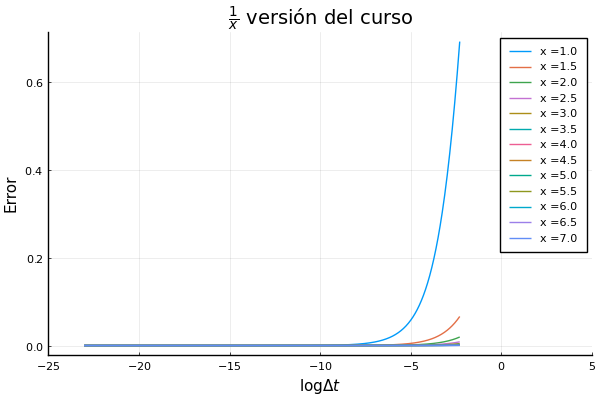

In [62]:
################### tan(1/x) ##################
Δt = [Float64(10^(-i)) for i in 1:0.01:10]
plot(xlim = (-25,5))
for x in 1:0.5:7
    f(x) = tan(1/x)
    ErrTanXinv(Δt) = d_curso(f,x,Δx=Δt)+((tan(1/x))^2+1)/(x^(2)) #usamos la versión del curso
    plot!(log.(Δt),ErrTanXinv.(Δt), label = "x =$x")
end 
plot!(xlabel = L"\log{\Delta t}",ylabel="Error",title=L"$\frac{1}{x}$ versión del curso")

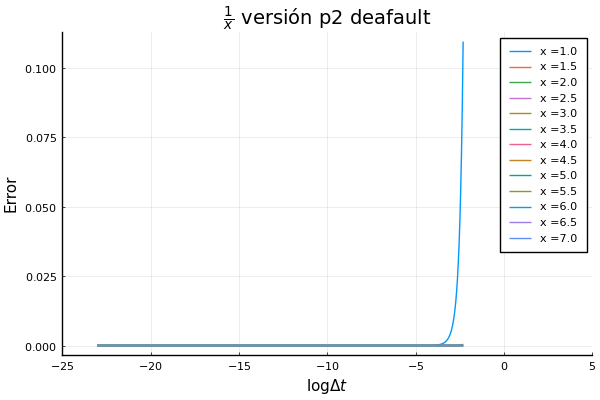

In [63]:
plot(xlim = (-25,5))
for x in 1:0.5:7
    f(x) = tan(1/x)
    ErrTanXinv(Δt) = d(f,x,Δx=Δt)+((tan(1/x))^2+1)/(x^(2)) #usamos la versión del problema 2 con coeficientes default
    plot!(log.(Δt),ErrTanXinv.(Δt), label = "x =$x")
end 
plot!(xlabel = L"\log{\Delta t}",ylabel="Error",title=L"$\frac{1}{x}$ versión p2 deafault")

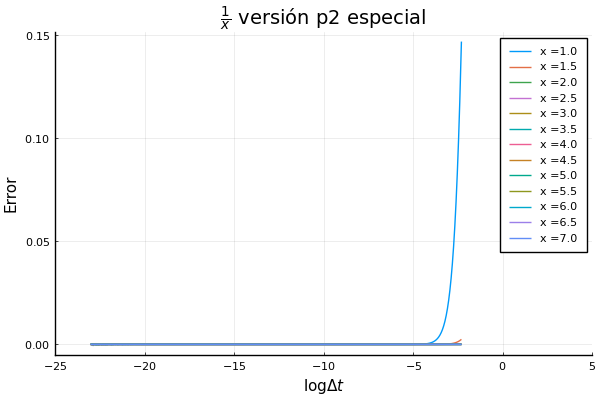

In [64]:
plot(xlim = (-25,5))
for x in 1:0.5:7
    f(x) = tan(1/x)
    ErrTanXinv(Δt) = d(f,x,Δx=Δt,coeficientes = [1//1,3//2,2//1,5//2,3//1])+((tan(1/x))^2+1)/(x^(2)) 
        #usamos la versión del problema 2 con coeficientes del problema 1
    plot!(log.(Δt),ErrTanXinv.(Δt), label = "x =$x")
end 
plot!(xlabel = L"\log{\Delta t}",ylabel="Error",title=L"$\frac{1}{x}$ versión p2 especial")

En general observamos que la versión simple de la derivada (la del curso) es la que presenta mayor error para pasos más grandes. Notamos también que para valores entre $10^{-5}$ y $10^{-20}$, el error en todos los casos es aproximadamente directamente proporcional al valor de $\Delta t$. Ahora, de los 2 métodos con la derivada del problema 2, vemos que su error es de 100 a 1000 veces menor que el de la derivadda sencilla. Entre ellos, en todos los casos, la que presenta menor error es la versión que tiene coeficientes default, esto debe ser porque estos coeficientes están distribuidos simetricamente, es decir, se toman pasos a ambos lados del centro (-2,2,-1 y 1), mientras que en el caso de laversión con los coeficientes del problema 1, estos son todos hcia la derecha del centro. Además, también se observa un comportamiento particular delos errores en cada función. Para el $sin(x)$ el error es mayor en $x=1.5$ esto se puede deber a que la pendiente en ese punto es cercana a la que hay en $x=\pi/2$, donde es máxima. Observamos en $1/x$ y $tan(1/x)$ que los puntos cercanos a sus singularidades, también presentan un error mayor, denuevo, puede ser porque su pendiente (la derivada) en esos puntos tiende a infinito, es decir, es muy grande en sus cercanías. Para $x^2$ vemos que el error se comporta igual para todos los valores de x, puede ser que esto se deba a que su derivada es una función lineal. Finalmente, notamos que para valores de $\Delta t$ menores a $10^{-20}$, el error emieza a variar anormalmente, aumenta pero no es claro si la diferencia con la que se calcula se vuelve positiva o negativa. Esta variación puede deberse a la precisión del float que se usa en $\Delta t$.

4. **Dificultad media**. Este ejercicio es similar al anterior. Elige una función no polinomial que se pueda derivar al menos 4 veces sin que su derivada en todo punto sea 0. Revisa cómo varía el error en la primera deferencial numérica y compara con cómo varía al obtener la segunda, tercera y hasta cuarta diferencial, usando 2 métodos, (i) usando 4 veces la diferencial simple. (i) obteniendo con la función del ejercicio 2, la funciones para calcular la primera, segunda, tercera y cuarta diferencial numérica. 

Nota: Usa SymPy para obtener las derivadas simbólicas (analíticamente) de las funciones. Así puedes poner funciones no tan simples. 

Nota2: (no cuenta) Prueba también usando BigFloats en el valor que evalues la derivada. En particular prueba como varía para valores pequeños (x = 0.01) en el caso de la segunda derivada de 1/x y de tan(1/x). 

In [65]:
# Vamos a utilizar la función x*e^(x^2)
#primero calculamos sus derivadas simbólicamante 
using SymPy
@vars x
f(x) = cos(x)*exp(x^2) 
[diff(f(x),x);
diff(diff(f(x),x),x);
diff(diff(diff(f(x),x),x));
diff(diff(diff(diff(f(x),x),x)),x)]   

4-element Array{Sym,1}:
                                                                             2*x*exp(x^2)*cos(x) - exp(x^2)*sin(x)
                                                     4*x^2*exp(x^2)*cos(x) - 4*x*exp(x^2)*sin(x) + exp(x^2)*cos(x)
                          8*x^3*exp(x^2)*cos(x) - 12*x^2*exp(x^2)*sin(x) + 6*x*exp(x^2)*cos(x) - 5*exp(x^2)*sin(x)
 16*x^4*exp(x^2)*cos(x) - 32*x^3*exp(x^2)*sin(x) + 24*x^2*exp(x^2)*cos(x) - 40*x*exp(x^2)*sin(x) + exp(x^2)*cos(x)

In [66]:
#Definimos las funciones de referencia:
df(x) = exp(x^2)*(2*x*cos(x)-sin(x))
d2f(x) = exp(x^2)*(4*x^2*cos(x)-4*x*sin(x)+cos(x))
d3f(x) = exp(x^2)*(8*x^3*cos(x)-12*x^2*sin(x)+6*x*cos(x)-5*sin(x))
d4f(x) = exp(x^2)*(16*x^4*cos(x)-32*x^3*sin(x)+24*x^2*cos(x)-140*x*sin(x)+cos(x))

d4f (generic function with 1 method)

In [107]:
#Ahora vamos a hacer una comparación de los errores
# Usaremos 6 coeficientes para la derivada del problema 2 coeficientes = [-1//1 1//1 2//1 -2//1 3//1 -3//1]
### Primera derivada ###
x = 0.5 #vamos a evaluar en este punto
Err1 = [0.0,0.0,0.0,0.0]
Err2 = [0.0,0.0,0.0,0.0]

Err1[1] = d_curso(f,x)-df(x)
D1(t) = d(f,t,coeficientes = [-1//1 1//1 2//1 -2//1 3//1 -3//1])
Err2[2] = D1(x)-df(x)
println("Error 1era derivada con versión del curso: \n", Err1[1])
println("Error 1era derivada con versión del problema 2: \n", Err2[1])

Error 1era derivada con versión del curso: 
1.1888237923977756e-6
Error 1era derivada con versión del problema 2: 
0.0


In [108]:
### Segunda deivada 
d1(t) =  d_curso(f,t)
Err1[2] = d_curso(d1,x)-d2f(x)
D2(t) = d(f,x,n=2,coeficientes = [-1//1 1//1 2//1 -2//1 3//1 -3//1])
Err2[2] = D2(x)-d2f(x)
println("Error 2da derivada con versión del curso: \n", Err1[2])
println("Error 2da derivada con versión del problema 2: \n", Err2[2])

Error 2da derivada con versión del curso: 
-11887.726680731705
Error 2da derivada con versión del problema 2: 
-9.832636166778748e-17


In [109]:
#### tercera deivada ####
d2(t) =  d_curso(d1,t)
Err1[3] = d_curso(d2,x)-d3f(x)
D3(t) = d(f,t,n=3,coeficientes = [-1//1 1//1 2//1 -2//1 3//1 -3//1])
Err2[2] = D3(x)-d3f(x)
println("Error 3ra derivada con versión del curso: \n", Err1[3])
println("Error 3ra derivada con versión del problema 2: \n", Err2[3])


Error 3ra derivada con versión del curso: 
1.1887726680731662e14
Error 3ra derivada con versión del problema 2: 
0.0


In [110]:
#### cuarta deivada ####
d3(t) =  d_curso(d2,t)
Err1[4] = d_curso(d3,x)-d4f(x)
D4(t)=d(f,t,n=4,coeficientes = [-1//1 1//1 2//1 -2//1 3//1 -3//1])
Err2[4] = D4(x)-d4f(x)
println("Error 4ta derivada con versión del curso: \n", Err1[4])
println("Error 4ta derivada con versión del problema 2: \n", Err2[4])

Error 4ta derivada con versión del curso: 
-1.1887726680731663e24
Error 4ta derivada con versión del problema 2: 
30.779728848850333


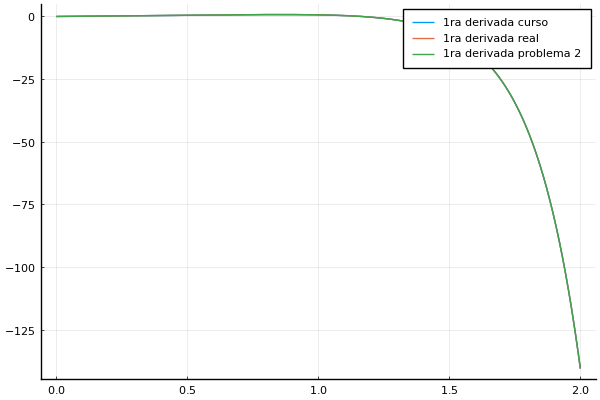

In [113]:
#
d4(t)=d_curso(d3,t)

#Graficamos las funciones derivada del curso de 0 a 2 
t = 0:0.001:2
plot()
plot!(d1,t,label ="1ra derivada curso")
plot!(df,t,label ="1ra derivada real")
plot!(D1,t,label="1ra derivada problema 2")

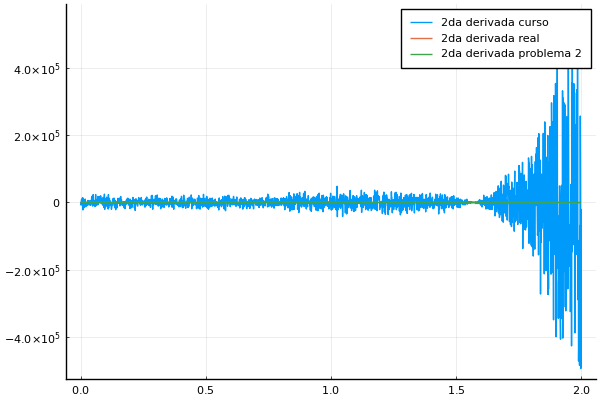

In [114]:
#graficamos la 2da derivada 
t = 0:0.001:2
plot()
plot!(d2,t,label ="2da derivada curso")
plot!(d2f,t,label ="2da derivada real")
plot!(D2,t,label="2da derivada problema 2")

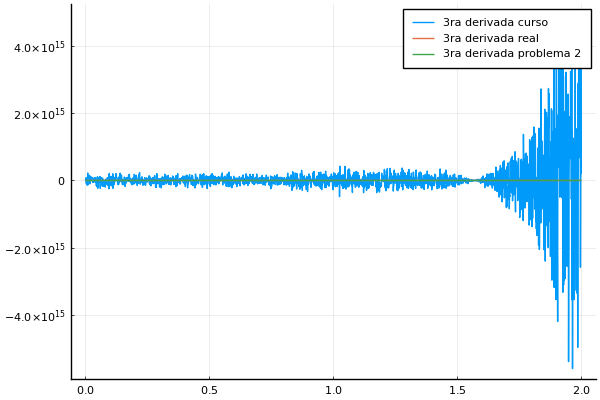

In [116]:
#graficamos la 3ra derivada 
t = 0:0.001:2
plot()
plot!(d3,t,label ="3ra derivada curso")
plot!(d3f,t,label ="3ra derivada real")
plot!(D3,t,label="3ra derivada problema 2")

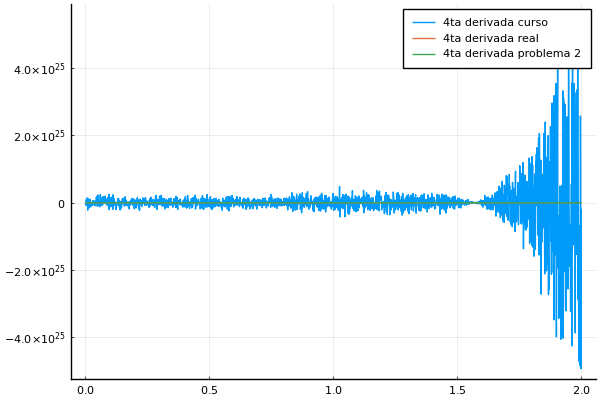

In [118]:
#graficamos la 3ra derivada 
t = 0:0.001:2
plot()
plot!(d4,t,label ="4ta derivada curso")
plot!(d4f,t,label ="4ta derivada real")
plot!(D4,t,label="4ta derivada problema 2")

El cálculo con la derivada del problema 2 es muy bueno en general (ordenes 1,2,3 y 4) para valores cercanos a 0 de la función evaluada. Por otro lado, el cálculo con la derivada del curso tiene un crecimiento en el errordesde la segunda derivada. Este error crece mucho con cada derivada y mintras más alejado del 0 está el valor donde se evalúa. Ambas derivadas presentan errores grandes (superiores a 1) para valores mayores que 1.5 en el caso de las derivadas de 1 a 3 y desde 0.3 para las derivadas de orden 4. EL problema puede ser que la función crece muy rápidamente y sus derivadas también. El crecimiento de las derivadas es exponencial, es por eso que el error aumenta rápidamente.

5. **Fácil**. Utiliza SymPy para hacer varias integrales indefinidas. Aplícalo a alguna integral que sepas que no se puede obtener analíticamente. ¿Qué sucede en ese caso? vuelve esa integral definida. ¿Qué sucede ahora? Prueba usar la función N() sobre esta integral definida. ¿Qué sucede? ¿Hay alguna forma de obtener el valor numérico?

In [170]:
using SymPy
@vars x
#haremos 4 integrales indefinidas
integrate(1/cot(x),x)

-log(cos(x))

In [173]:
integrate(exp(sin(x))*(-sin(x)+(cos(x))^2),x)

 sin(x)       
ℯ      ⋅cos(x)

In [177]:
integrate(x^2*cos(x)-sec(x))

 2                       log(sin(x) - 1)   log(sin(x) + 1)           
x ⋅sin(x) + 2⋅x⋅cos(x) + ─────────────── - ─────────────── - 2⋅sin(x)
                                2                 2                  

In [189]:
integrate((-x*sin(x)+cos(x))*exp(x*cos(x)))

 x⋅cos(x)
ℯ        

Integrales analíticas las muestra sin problema :)

In [194]:
#ahora lo aplicamos a la función sin(x)/x 
integrate(sin(x)/x,x)

Si(x)

In [195]:
#ahora a la función e^(x^2)
integrate(exp(x^2),x)

√π⋅erfi(x)
──────────
    2     

In [196]:
#ahora a un porducto de ambas
integrate(exp(x^2)*sin(x)/x,x)

⌠                
⎮  ⎛ 2⎞          
⎮  ⎝x ⎠          
⎮ ℯ    ⋅sin(x)   
⎮ ──────────── dx
⎮      x         
⌡                

Para integrales no analíticas conocidas, muestra su nombre como funciones especiales, y para integrales no analíticas desconocidas, simplemente muestra la integral sin cambios.

In [198]:
#intentaremos integrar entre 0 y 1
integrate(exp(x^2)*sin(x)/x,1,2)

2                
⌠                
⎮  ⎛ 2⎞          
⎮  ⎝x ⎠          
⎮ ℯ    ⋅sin(x)   
⎮ ──────────── dx
⎮      x         
⌡                
1                

Aún haciéndola definida, simplemente muestra la expresión

In [204]:
#intentaremos integrar entre 1 y 2 y pedimos resultado numérico 
N(integrate(exp(x^2)*sin(x)/x,1,2))

┌ Info: FAILED to find type for Integral(exp(x^2)*sin(x)/x, (x, 1, 2)). Please report
└ @ SymPy /home/jigalindo0104/.julia/packages/SymPy/VpBut/src/numbers.jl:247


2                
⌠                
⎮  ⎛ 2⎞          
⎮  ⎝x ⎠          
⎮ ℯ    ⋅sin(x)   
⎮ ──────────── dx
⎮      x         
⌡                
1                

Muestra un error, y no la calcula. Para obtener un valor numérico, quiza se pueda utilizar otro método, por ejemplo, sumas de Riemann. 

In [205]:
#intentamos ahora con una de las funciones conocidas
integrate(exp(x^2),1,2)

  √π⋅erfi(1)   √π⋅erfi(2)
- ────────── + ──────────
      2            2     

Hay una solución, pero la muestra en términos de las funciones especiales. Tienen vallores conocidos, por lo que debería ser posible obtener el valor numérico

In [206]:
N(integrate(exp(x^2),1,2))

14.98997601960005

En efecto, para este caso es posible. 

6. **Fácil**. Compara el tiempo que tarda en hacer una derivada de orden 5 numéricamente (con 2 métodos, diferenciando 5 veces la función y usando una función que obtenga la quinta diferencial en un solo paso) y simbólicamente. Prueba con diferentes funciones (juega un ratito con SymPy y Benchmarktools). ¿Hay algo que haga más lenta la derivación simbólica?  

In [217]:
using BenchmarkTools
#hacemos la derivada numérica primero. vamos a usar la función e^x*cos(x) 
f(x) = exp(x)*cos(x)
x₀ = 1.5 #este es el punto donde la evaluaremos 

#diferenciamos 5 veces
df(x) = d(f,x, coeficientes = [1//1 -1//1]) #usamos la versión del problema 2 con 2 coeficientes (1,-1)
d2f(x) = d(df,x,coeficientes = [1//1 -1//1])
d3f(x) = d(d2f,x,coeficientes = [1//1 -1//1])
d4f(x) = d(d3f,x,coeficientes = [1//1 -1//1])
d5f(x) = d(d4f,x,coeficientes = [1//1 -1//1])
t1 = @belapsed  d5f(x₀)

0.000257734

In [211]:
#con el método de un solo paso 
t2 = @belapsed d(f,1.5,n=5,coeficientes = [1//1 -1//1 2//1 -2//1 1//2 -1//2])

5.1206e-5

In [215]:
#con el método simbólico
using SymPy
@vars x
t3 = @belapsed diff(diff(diff(diff(diff(f(x),x),x),x),x),x)(x₀) 

0.000496398

La diferenciación simbólica 5 veces tarda aproximadamente lo mismo que la numérica 5 veces (con 2 coeficientes),pero 10 veces más que la numérica de un solo paso. Para hacer la simbólica aún más lenta, podríamos pedir el resultado numérico

In [218]:
t4 = @belapsed N(diff(diff(diff(diff(diff(f(x),x),x),x),x),x)(x₀)) 

0.000704665

Así es 3 veces más lenta que la numérica 5 veces 

In [219]:
#intentaremos con otra función 
g(x) = x^5*sin(x)
#diferenciamos 5 veces
dg(x) = d(g,x, coeficientes = [1//1 -1//1]) #usamos la versión del problema 2 con 2 coeficientes (1,-1)
d2g(x) = d(dg,x,coeficientes = [1//1 -1//1])
d3g(x) = d(d2g,x,coeficientes = [1//1 -1//1])
d4g(x) = d(d3g,x,coeficientes = [1//1 -1//1])
d5g(x) = d(d4g,x,coeficientes = [1//1 -1//1])
t1 = @belapsed  d5g(x₀)

0.000223993

In [220]:
#con el método de un solo paso 
t2 = @belapsed d(g,1.5,n=5,coeficientes = [1//1 -1//1 2//1 -2//1 1//2 -1//2])

4.2914e-5

In [222]:
#método simbólico
t3 = @belapsed N(diff(diff(diff(diff(diff(g(x),x),x),x),x),x)(x₀)) 

0.000981018

El resultado es masomenos el mismo que con la función anterior. La simbólica es la más lenta, pero muy con un tiempo cercano a la numérica aplicada 5 veces, pero 10 veces más lenta que la numérica de un solo paso 

## Diferenciación automática

7. **Fácil**. Copia del video (o notebook), el objeto de número dual y los métodos de +, -, /, ^, sin y cos para números duales. Prueba que con esto haga la diferencial automática de tan(x). Además agrega los métodos necesarios para exp. Prueba que con estos métodos haga la derivación automática de $exp(tan(x))+tan(x)^2$ correctamente. 

In [1]:
#estructura de los números duales
struct D{T1 <: Number, T2 <: Number} <: Number
    valor::T1
    derivada::T2
end

In [2]:
# métodos básicos:
import Base.+, Base.-, Base.*, Base./, Base.^

+(a::D, b::D) = D(a.valor + b.valor, a.derivada + b.derivada)
+(a::D, b::Number) = D(a.valor + b, a.derivada)
+(b::Number, a::D) = D(a.valor + b, a.derivada)

-(a::D, b::D) = D(a.valor - b.valor, a.derivada - b.derivada)
-(a::D, b::Number) = D(a.valor - b, a.derivada)
-(b::Number, a::D) = D(-a.valor + b, -a.derivada)

*(a::D, b::D) = D(a.valor*b.valor, a.derivada*b.valor+b.derivada*a.valor)
*(a::D, b::Number) = D(b*a.valor,b*a.derivada)
*(b::Number, a::D) = D(b*a.valor,b*a.derivada)

/(a::D, b::D) = D(a.valor/b.valor,(a.derivada*b.valor-a.valor*b.derivada)/b.valor^2)
/(a::D, b::Number) = D(a.valor/b,a.derivada/b)
/(b::Number, a::D) = D(b/a.valor,-b*a.derivada/a.valor^2)

function ^(a::D, b::Real)
    if b==0.0
        return  D(1.0,0.0)
    else
        return  D(a.valor^b, b*a.valor^(b-1)*a.derivada)
    end    
end
function ^(a::D, b::Int)
    if b==0
        return  D(1,0)
    else
        return  D(a.valor^b, b*a.valor^(b-1)*a.derivada)
    end        
end
# métodos de sin y cos:
import Base.sin, Base.cos

sin(a::D) = D(sin(a.valor), cos(a.valor)*a.derivada)
cos(a::D) = D(cos(a.valor), (-1)*sin(a.valor)*a.derivada)

cos (generic function with 14 methods)

In [3]:
#Agregamos la función para extraer la verivada
derivada(f, x) = f(D(x,one(x))).derivada

derivada (generic function with 1 method)

In [4]:
#probamos que deriva la función tangente, para lo cual agregamos la definición de funcion tangente  como sin/cos
import Base.tan

tan(t)=sin(t)/cos(t)

using SymPy
@vars x
derivada(tan,x)

   2         2   
sin (x) + cos (x)
─────────────────
        2        
     cos (x)     

In [5]:
#ahora añadiremos los métodos de exp
import Base.exp
exp(a::D)=D(exp(a.valor),exp(a.valor)*a.derivada)

exp (generic function with 17 methods)

In [6]:
#probamos que derive la función que queremos:
f(x) = exp(tan(x))+tan(x)^2

derivada(f,x)

                     sin(x)                               
                     ──────                               
⎛   2         2   ⎞  cos(x)     ⎛   2         2   ⎞       
⎝sin (x) + cos (x)⎠⋅ℯ         2⋅⎝sin (x) + cos (x)⎠⋅sin(x)
─────────────────────────── + ────────────────────────────
             2                             3              
          cos (x)                       cos (x)           

In [7]:
#verificamos usando SymPy
@vars x
diff(f(x),x)

⎛   2       ⎞  tan(x)   ⎛     2       ⎞       
⎝tan (x) + 1⎠⋅ℯ       + ⎝2⋅tan (x) + 2⎠⋅tan(x)

Funciona perfectamente.

8. **Fácil**. Números duales: Pensemos en la multiplicación $(a+\epsilon b)(c+ \epsilon d) = ac+\epsilon (bc+ad) + \epsilon^2 bd$. Si $\epsilon$ es pequeño, podemos despreciar su cadrado y quedarnos con $(a+\epsilon b)(c+ \epsilon d) \approx ac+\epsilon (bc+ad)$. Con esta regla podemos definir los números duales. Igual que en los complejos tenemos el número $i$ que nos sirve para definir la parte imaginaria, en los duales tenemos el número $\epsilon$ que nos sirve para definir la diferencial. Muestra que esta regla multiplicativa se puede obtener si representamos los números duales como las matrices y la multiplicación habitual de matrices: 
$$D(a,b) = \begin{pmatrix}
a & b \\
0 & a
\end{pmatrix}$$

usa esto para hacer una nueva función de derivada automática. Prueba que ambas funciones obtengan los mismos resultados sobre diferentes funciones y mide sus tiempos de cómputo usando BenchmarkTools. ¿Qué versión es más rápida?


Prueba: 

Sean $D_1$ y $D_2$ 2 duales definidos en su forma matricial. $D_1 = D(a,b)$ y $D_2 = D(c,d)$, entonces,

$$D_1D_2 = D(a,b)D(c,d) = \begin{pmatrix} a & b \\0 & a \end{pmatrix}\begin{pmatrix} c & d \\0 & c \end{pmatrix} =\begin{pmatrix} (a)(c)+(b)(0) & (a)(d)+(b)(c) \\(0)(a)+(b)(0) & (a)(c)+(b)(0) \end{pmatrix} =\begin{pmatrix} ac & ad+bc \\0 & ac \end{pmatrix} = D(ac,ad+bc)$$

$$\implies D_1D_2 = D(a,b)D(c,d) = D(ac,ad+bc)$$

Que coincide con la definición original del dual.

In [52]:
#Ahora vamos a definir un nuevo dual
D2(a,b) = [ a    b ;
            0.0  a ]

#Definimos la nueva  función derivada
function Derivada(f,x)
    D = D2(x,one(x))
    F = f(D)
    #println(F[1,2])
    return F[1,2]
end    

Derivada (generic function with 1 method)

In [60]:
#Ahora vamos a probar la velocidad de diferentes funciones 
using BenchmarkTools

#### Fiunción 1 > Polinomio ####
f(x) = x^10 - 4*x^7 + 8*x^5 - 9*x^3 + x .-1  
t1 = @belapsed Derivada(f,1.0)
t2 = @belapsed derivada(f,1.0)

if t1>t2
    println("La versión de matrices en más rápida con polinomios")
else
    println("La versión original es más rápida con polinomios")
end  
println("t1/t2 = ",t1/t2)

La versión de matrices en más rápida con polinomios
t1/t2 = 10.379361131799339


In [61]:
#### Función 2 > Exponecial ####
f(x) = exp(x^6) - 3*exp(5*x.-2)
t1 = @belapsed Derivada(f,1.0)
t2 = @belapsed derivada(f,1.0)

if t1>t2
    println("La versión de matrices en más rápida con funciones exponenciales")
else
    println("La versión original es más rápida con funciones exponenciales")
end 
println("t1/t2 = ",t1/t2)

La versión de matrices en más rápida con funciones exponenciales
t1/t2 = 92.98871835529029


In [62]:
#### Función 3 > Trigonométrica ####
f(x) = tan(x) - sin(x)*cos(x)^2 
t1 = @belapsed Derivada(f,1.0)
t2 = @belapsed derivada(f,1.0)

if t1>t2
    println("La versión de matrices en más rápida con funciones trigonométricas")
else
    println("La versión original es más rápida con funciones trigonométricas")
end 
println("t1/t2 = ",t1/t2)

La versión de matrices en más rápida con funciones trigonométricas
t1/t2 = 130.61362054438217


9. **Muy difícil**. (reto opcional, es decir, no cuenta (y no los asesoraré al respecto), pero es una forma de medir qué tan buenos son programando. Si lo logran, van muy bien). Haz una función que diferencie automáticamente $n$ veces, pero que incluya como casos especiales la derivación de funciones trigonométricas sin y cos para volver más eficiente la derivación. Prueba que tu función haga rápidamente la diferenciación automática de estas dos funciones, y que también sea rápida con la diferenciación de un número multiplicando cualquiera de estas funciones.  

In [106]:
#Por lo pronto, incluiremos aquí la diferenciación automática n-esima recursiva vista en clase
derivada(f, x::D) = f(D(x,D(1,0))).derivada

function derivadaN(f,x,n)
    if n==0    
        return f(x)
    end
    g(x)=derivada(f,x)
    x=derivadaN(g,x,n-1)
end    

derivadaN (generic function with 1 method)

10. **Fácil**. Usando el teorema de la función invertible, se puede llegar a que un elemento de volumen en un espacio $n$-dimensional está dado por: $dV = \left| \frac{\partial(\vec{x})}{\partial(\vec{u})} \right| d\vec{u}$. Por lo tanto, la integral de volumen $\int_V f(\vec{x})d\vec{x} = \int_V f(\vec{u})\left| \frac{\partial(\vec{x})}{\partial(\vec{u})} \right|d\vec{u}$ ($\left| \frac{\partial(\vec{x})}{\partial(\vec{u})} \right|$ es el determinante del Jacobiano de la transformación de $u$ a $x$). Haz una función que tenga como argumentos $f$, la transformación de $u$ a $x$ (también una función) y los valores de $u$ y arroje el elemento de volumen correspondiente. 

Nota: Puedes calcular el Jacobiano con ForwarDiff o vía diferenciación numérica, pero **no puedes usar SymPy** (no tendría sentido, con SymPy puedes integrar directamente! El propósito es hacer integrales rápidas) 

In [205]:
using LinearAlgebra #cargamos la librería de álgebra lineal

using ForwardDiff #vamos a utilizar ForwardDiff

function  dV(x,u;Δu=0.01) #no incluimos a la función f porque no es necesaria
    du = [Δu for i in 1:length(u)]
    Jac = ForwardDiff.jacobian(x,u)
    return du.*abs(det(Jac))
end


dV (generic function with 2 methods)

In [206]:
#Probamos la función con coordenadas esféricas
U = [3.0, 3.141592/4,3.141592/4] #[r,θ,ϕ]
X(w) = [w[1]*sin(w[2])*cos(w[3]), w[1]*sin(w[2])*sin(w[3]), w[1]*cos(w[3])] #transformación

dV(X,U)

3-element Array{Float64,1}:
 0.03181981035266748
 0.03181981035266748
 0.03181981035266748

11. **Talachudo**. Escribe el potencial que se forma por poner 2 electrones en los vértices de un triángulo equilátero de lado 1 y un protón en el vértice restante. Pon un partícula cargada (positivamente) en el plano (asegurándote que no inicien en los vértices del triángulo), y después evoluciona con pasos de tiempo MUY pequeños, la partícula. Recuerda que $\vec{F} = m \vec{a} = -\nabla U(\vec{x})$ y por lo tanto $ \vec{v}(t) \approx \frac{-\nabla U(\vec{x}(t-\Delta t))}{m}$ y $\vec{x}(t) \approx \vec{x}(t-\Delta t) + \vec{v}(t-\Delta t) \Delta t$. Repite esto para muchas partículas (unas 100) con diferentes posiciones iniciales (y velocidad inicial 0) y dibuja las trayectorias (para ver todo el flujo de partículas). 

**NOTA IMPORTANTE**: para hacer razonablemente bien esto requieres hacer pasos de tiempo en extremo pequeños y por lo tanto necesitas al menos unas 100mil iteraciones para que se vea el movimiento. Si graficas por cada partícula (digamos unas 100 partículas) esos 100mil iteraciones, consumirás toda la memoria de tu computadora. Por lo tanto, antes de graficar asegúrate que sólo graficas algunos puntos (por ejemplo, sólo 1 de cada mil puntos de la trayectoria). 

Nota 2: Puedes hacer el ejercicio usando diferenciación numérica, pero será menos preciso (que usando diferenciación automática) y el error acumulado crece realmente mucho. 

Nota 3: No es parte del ejercicio, pero deberías intentar repetir el dibujo con ahora poniendo cárgas negativas y ver qué pasa (el potencial no es simétrico por que hay 2 cargas fijas negativas y una positiva). 

Solución:

Por simplicidad, colocaremos los electrones sobre el eje x en $\vec{E1} =(-1/2,0)$ y $\vec{E1} = (1/2,0)$. Así, el protón estará ubicado en el punto $\vec{P1} = (0,\sqrt{3}/2)$  

El potencial entonces tiene la forma 

$$U(\vec{x}) = K\left(\frac{e}{|\vec{E1}-\vec{x}|} +\frac{e}{|\vec{E2}-\vec{x}|}+\frac{p}{|\vec{P1}-\vec{x}|} \right)$$

In [264]:
using LinearAlgebra #cargamos la librería de álgebra lineal

using ForwardDiff #vamos a utilizar ForwardDiff

##### Primero veremos que funcione con 1 partícula

function Potencial(x)
        
    ##Particulas y sus cargas##
    E1 = [-1/2,0.0]
    E2 = [1/2,0.0]
    e = -1 #-1.602*10^(-19); #C carga del electrón
    P1 = [0.0,sqrt(3)/2]
    p = 1 #1.602*10^(-19); #C carga del protón
    
    k = 1 #8.9875517873681764*10^9; #constante de coulomb

    return k*(e*norm(E1-x)^(-1)+e*norm(E2-x)^(-1)+p*norm(P1-x)^(-1)) #función del potencial
end

m  = 1 # 9.11*10^(-31)   # kg masa de la partícula
acel(x,y) = ForwardDiff.gradient(Potencial,[x,y]).*(-1/m) #aproximación del vector velocidad

acel (generic function with 1 method)

In [271]:
using Plots
plotly()
#Ahora vamos a hacer la prueba
Δt = 10^(-4)
#vectores de posicion de 1 partícula
x  = []
y  = []
xi = 0.6; #posición inicial de la partícula
yi = 0.6;
V = [1.0,1.0];
for i in 1:1000000
    push!(x,xi)
    push!(y,yi)
    V += acel(xi,yi)*Δt
    xi+= V[1]*Δt
    yi+= V[2]*Δt
end  
plot(xlim = (-5,5),ylim =(-5,5))
plot!(x[1:1000:end],y[1:1000:end], color = :green, linewidth = 1)
scatter!([E1[1],E2[1]],[E1[2],E2[2]],markercolor=:blue,label = "electrónes")
scatter!([P1[1]],[P1[2]],markercolor=:red,label = "protón")

#x[1:1000:end],y[1:1000:end]


In [313]:
#Ahora vamos a hacer la prueba de 100 partículas
#acomodaremos las partículas en un círculo de radio 10 alrededor 
Δang = 2*3.14159265/100
x0=[10*cos(i*Δang) for i in 1:100]
y0=[10*sin(i*Δang) for i in 1:100].-0.5
#todas con velocidad inicial 0
#vx = zero(x0)
#vy = zero(x0)
plot(xlim = (-8,8),ylim =(-8,8),key=false)
Δt = 3.5*10^(-4)
for i in 1:100
    x  = []
    y  = []
    xi = x0[i]; #posición inicial de la partícula
    yi = y0[i];
    V = [0.0,0.0]
    for i in 1:100000
    push!(x,xi)
    push!(y,yi)
    V += acel(xi,yi)*Δt
    xi+= V[1]*Δt
    yi+= V[2]*Δt
    end  
    plot!(x[1:1000:end],y[1:1000:end], color = :green, linewidth = 1)
end
scatter!([E1[1],E2[1]],[E1[2],E2[2]],markercolor=:blue, label = "")
scatter!([P1[1]],[P1[2]],markercolor=:red,label = "")

    

## Integración

12. **Fácil**. Haz una función que calcule la integral de linea de una función 1D (usando la regla de Simpson y diferenciación automática o numérica) entre 2 valores de x. Esta debe tener como argumentos la función que se integrará y los límites de integración. 

Ahora, supón que quieres hacer un techo de lámina de esos que tienen onditas que mida $3m \times 2m$ y las onditas estén a lo largo del lado de $3m$. Las ondas siguien la función $f(x, y) = sin(x)$. ¿De qué dimensiones necesitas tu lámina inicial (antes de formar las onditas)? (por supuesto, necesitas integrar numéricamente, por simple que suena el problema, no se puede resolver analíticamente!!). 

In [248]:
#primero difinimos la integración con regla de simpson
function s∫(f, a,b;n = 500)
    Δx = (b-a)/n
    sum([(f(x)+f(x+Δx)+4*f(x+Δx/2)) for x ∈ a:Δx:(b-Δx)].*Δx/6)
end

#ahora vamos a definir una función que calcule la expresión de la integralde linea en 1D
function linef(f,x)
    try 
        return sqrt(1+(derivada(f,x))^2)
    catch
        return sqrt(1+d(f,x)^2)
    end    
end

#Finalmente la función de integral de linea
"""
Esta función calcula la longitd de una curva C(t) en un intervalo [a,b]
"""
function lineInt(C,a,b;n = 500)
    f(x) = linef(C,x)
    return s∫(f, a,b;n = n)
end    

lineInt

In [257]:
#Ahora vamos a calcular la longitud de la lámina. 
#En un techo de lámina con onditas, cada onda completa abarca aproximadamente 20 centímetros
#entonces, 0.2 metros equivalen a 2π del avance de la función, de modo que 3 metros son 30π
# la integral va entonces de 0 a 30π
l = lineInt(sin,0,30*3.14159265)

#Ahora convertimos a metros 
Longitud_total_de_lámina = l/(2*3.14159265)*0.2
println("Se requiere una lámina de ",Longitud_total_de_lámina," m x 2 m")

Se requiere una lámina de 3.648020169595485 m x 2 m


13. **Dificultad media**. Generaliza la función de arriba a varias dimensiones. Es decir, se quiere calcular la integral $\int_C f(s) ds$, donde $f$ es una función que se evalua sobre una curva $C$, es decir $f:C \rightarrow \mathbb{R}$. Para esto requieres parametrizar $C$ con una función $\vec{r}(t)$. Esto implica que los argumentos de tu función serán $f$, $r$ y el intervalo de $t$. 

Utiliza esta función para calcular el trabajo (energía mínima) de mover una nave (de masa 1) de la tierra a la luna. Considera la influencia de la tierra, sol y luna y luego sólo considera la influencia de tierra y luna. Puedes pensarlo como si la nave se mueve a velocidad casi infinita (versión fácil: tierra, sol y luna no se mueven) o sofisticarlo y pensar que la luna se está moviendo con respecto al sol y la tierra (en cuyo caso sí importa la trayectoria que se siga). 

Solución:

En n dimensiones, la integral de linea sobre una curva $\gamma$ de una función escalar f está dada por

$$\int_{\gamma}f dl = \int_{a}^{b}f(\gamma(t))||\gamma'(t)||dt$$

Por otro lado, para una función vectorial $\vec{F}$, y $\gamma$ está parametrizado por $t$, la integral de linea está dada por

$$\int_{\gamma}\vec{F} d\vec{l} = \int_{a}^{b}<\vec{F}(\gamma(t)),\vec{\gamma}'(t)>dt$$



In [310]:
#ahora vamos a definir una función que calcule la expresión de la integralde linea en 1D
using ForwardDiff
using LinearAlgebra

#definimos esta función auxiliar
function linef(f,γ,t) # f es una función de R^n a R y γ es una función de R a R^n.
    #try 
        return f(γ(t))*norm(ForwardDiff.derivative.(γ,t))
    #catch
    #    return 0
    #end    
end

function lineF(F,r,t) # F es una función de R^n a R^n y γ es una función de R a R^n.
    #try 
        return F(r(t))⋅(ForwardDiff.derivative(r,t))
    #catch
    #    return 0
    #end    
end



#Finalmente la función de integral de linea
"""
Esta función hace la integral de linea sobre una curva C(t) para una función escalar f
t corre entre a y b
"""
function lineInt(f,γ,a,b;n = 500)
    F(x) = linef(f,γ,x)
    return s∫(F,a,b;n = n) #usamos la regla se simpson para calcular la integral
end    
"""
Esta función hace la integral de linea sobre una curva C(t) para una función escalar f
t corre entre a y b
"""
function lineInt2(F,r,a,b;n = 500)
    Fun(x) = lineF(F,r,x)
    return s∫(Fun,a,b;n = n) #usamos la regla se simpson para calcular la integral
end    


lineInt2

Ahora vamos a resolver el problema. Consideraremos los objetos celestes estáticos. Además supondermos que el movimiento ocurre unicamente sobre un plano. Luego, como la distancia del lugar dondde ocurre el movimiento al Sol es mucho mayor que el desplazamiento, se considerará la fuerza gravitacional del sol, como una constante en dirección y positiva. Colocaremos el centro del marco de referencia en el centro de la tierra, y vamos a colocar a la luna sobre el eje x positivo. 

El trabajo que realizará la nave espacial estará dado por 

$$W = -\int_{\gamma}\vec{F}d\vec{l}=-\int_{\gamma}[\vec{F_{sol}}+\vec{F_{luna}}+\vec{F_{tierra}}]d\vec{l}$$

con $\gamma$ la trayectoria que siga.

In [312]:
#Procedemos a resolver:
# radios 
R_tierra = 6.371*10^6   #m
R_luna   = 1.7374*10^6 #m
# masas
M_Sol    = 1989*10^30 #kg
M_tierra = 5972*10^24 #kg
M_luna   = 7349*10^22 #kg

D_Tierra_Luna =  3.84*10^8 #m
#D_Tierra_Sol = 1.5194*10^11 #m
#Constante de gravitación 
G = 6.672*10^(-11) #m^3/(kg s^2)

using LinearAlgebra

masa = 1 #kg
#las fuerzas
F_tierra(r) = r.*(-G*masa*M_tierra/norm(r)^3)
F_luna(r) = (r-[D_Tierra_Luna,0.0]).*(-G*masa*M_luna/norm(r-[D_Tierra_Luna,0.0])^3)
F_sol(r) =  (r-[0.0,D_Tierra_Sol]).*(-G*masa*M_Sol/norm(r-[0.0,D_Tierra_Sol])^3)

#Ahora, dado que los objetos no se mueven, el sistema es conservativo, por lo que no importa 
#la trayectoria de la nave. Parametrizaremos con una linea recta entre la superficie de la tierra 
#y la superficie de la luna, sobre el eje x en sus puntos más cercanos.
salida = [R_tierra,0.0]
llegada = [D_Tierra_Luna-R_luna,0.0]

r(t) = salida.*t + llegada.*(1-t) 
#t ∈ (0,1)
F(r) = F_tierra(r)+F_luna(r)+F_sol(r)

W = lineInt2(F,r,0.0,1.0;n = 500)

println("el trabajo de mover una nave de la tierra a la luna es de ",W," joules")


el trabajo de mover una nave de la tierra a la luna es de 26.46790040306419 joules


14. **Fácil**. Integrales múltiples: Generaliza la función de integración con el método de Simpson para que incluya funciones de varias variables (y varios intervalos). Prueba tu función con alguna integral que puedas resolver analíticamente (vía SymPy). 

In [1]:
#Primero, la integral por regla de simpson es:
function s∫(f, a,b;n = 500)
    Δx = (b-a)/n
    sum([(f(x)+f(x+Δx)+4*f(x+Δx/2)) for x ∈ a:Δx:(b-Δx)].*Δx/6)
end

s∫ (generic function with 1 method)

In [2]:
#Hacemos una función auxiliar
function integralN(f,x::Array{<:Real,1},i::Int64,a::Real,b::Real;n=500)
    function fi(y::Real)
        Y = x;
        Y[i] = y;
        return f(Y)
    end    
    return s∫(fi,a,b;n=n)
end    

integralN (generic function with 1 method)

In [30]:
"""
Esta función calcula la integral de simpson en N dimensoines
Recibe como argumentos el número de varbales N de una función F,
una matriz I de N x 2 con los intervalos de integración,
y n el número de subintervalos de la aproximación (predefinido 500)
"""
function s∫N(N::Int64,f,I::Array{<:Real,2};n =500)
    if N != 1
        g(x::Array{<:Real,1}) = integralN(f,x,1,I[1,1],I[1,2])
        h(x::Array{<:Real,1}) = g(append!([1.0],x))
        s∫N(N-1,h,I[2:end,1:end];n =n)
    elseif N == 1
        g(x::Array{<:Real,1}) = integralN(f,x,1,I[1,1],I[1,2])
        h(x) = g([1.0,x])
        return s∫(f,I[1,1],I[1,2],n=n)
    end    
end

s∫N

In [31]:
#Probamos la función
f(x) = 3*x[1]*x[2]*x[3]+1
I = [0.0 1.0;0.0 1.0;0.0 1.0]
N = 3
s∫N(N,f,I)

1.3750000000000002

In [29]:
#Verificamos con SymPy
using SymPy
@vars x y z 
G(x,y,z) = 3*x*y*z+1
integrate(G(x,y,z), (x,0.0,1.0),(y,0.0,1.0),(z,0.0,1.0))

1.37500000000000

In [26]:
#probamos con una función más complicada
f(x) = 3*sin(x[1])*x[2]+x[3]^2
I = [0.0 1.0;0.0 1.0;0.0 1.0]
N = 3
s∫N(N,f,I,n=50)

1.0228798745311278

In [27]:
#Verificamos con SymPy
using SymPy
@vars x y z 
P(x,y,z) = 3*sin(x)*y+z^2
integrate(P(x,y,z), (x,0.0,1.0),(y,0.0,1.0),(z,0.0,1.0))

1.02287987453112

Fucniona muy bien. 

15. **Talachudo**. Haz los pasos (que no hice en el video) para obtener la fórmula del trapecio, de Simpson y ve a un grado más (cúbico). 

En el caso del grado cúbico ¿Hay alguna ventaja de elegir los puntos por los que pasa el polinomio equidistantes? si sí, ¿cuál?  

Solución:

**Fórmula del trapecio**

Dada una función, $f(x)$, integrable de Riemann en un intervalo $[a,b]$, dada una partición del intervalo  la fórmula del trapecio consiste en hacer una interpolación de un par de puntos $(x_i,f(x_i))$ y $(x_{i+1},f(x_{i+1}))$ con un polinomio de primer grado. Esto es, conectaar los puntos con una linea recta.

Si suponemos que la partición $P = \{x_0,x_1,x_2,...,x_{n+1}\}$ es homogenea con $n+1$ puntos incluidos $x_0=a$ y $x_{n+1}=b$ vemos que  $(x_{i+1}-x_i) = \Delta x =(b-a)/n$ y entonces, se genera un trapecio en en el intervalo $(x_i,x_{i+1})$ con bases de lonitud  $f(x_i)$ y $f(x_{i+1})$ y altura $\Delta x = (b-a)/n$, de modo que el trapecio i-ésimo tiene area 
$$A(x_i) = \frac{[f(x_i)+f(x_i+\Delta x)]\Delta x}{2}$$
Así, una aproximación al área bajo la curva es 
$$\int_a^bf(x)dx \approx \sum_{i=0}^{n}A(x_i)=\sum_{i=0}^{n}\frac{[f(x_i)+f(x_i+\Delta x)]}{2}\Delta x$$
Si se toma el límite cuando $n\longrightarrow \infty$ ($\Delta x \longrightarrow 0$), se tiene la igualdad.
$$\int_a^bf(x)dx = \lim_{n\longrightarrow \infty}\sum_{i=0}^{n}\frac{[f(x_i)+f(x_i+\Delta x)]}{2}\Delta x$$


In [ ]:
#Con lo anterior tenemos una forma numérica de calcular la integral 
#Llegamos a la función vista en el curso, será más precisa mientras mayor sea el valor de n:
function t∫(f, a,b;n = 10000)
    Δx = (b-a)/n
    sum([(f(x)+f(x+Δx)) for x ∈ a:Δx:(b-Δx)].*Δx/2)
end

**Fórmula de Simpson**

Mismas hipótesis que en caso anterior. Tomamos una partición homogenea de n+1 puntos. La fórmula de Simpson se construye utilizando 3 puntos en lugar de 2, e interpola una parábola que pasa por esos puntos. 

En un intervalo $[x_i,x_{i+1}]$ consideremos los puntos $(x_i,f(x_i))$, $(x_{i+1},f(x_{i+1}))=(x_{i}+\Delta x,f(x_{i}+\Delta x))$ y el punto medio $(x_{mi},f(x_{mi}))$=$(\frac{x_i+x_{i+1}}{2},f\left(\frac{x_i+x_{i+1}}{2}\right)) = (x_{i}+\frac{\Delta x}{2},f\left(x_{i}+\frac{\Delta x}{2}\right))$  

Utilizando la fórmula del polinomio interpolador de lagrange obtenemos 

$$p_{i}(x) =f(x_i) \frac{(x-x_{mi})(x-x_{i+1})}{(x_i-x_{mi})(x_i-x_{i+1})}+f(x_{mi}) \frac{(x-x_i)(x-x_{i+1})}{(x_{mi}-x_i)(x_{mi}-x_{i+1})}+f(x_{i+1}) \frac{(x-x_i)(x-x_{mi})}{(x_{i+1}-x_i)(x_{i+1}-x_{mi})} = $$

$$=\frac{2}{\Delta x^2}\left[f(x_i)(x^2-(x_{i+1}+x_{mi})x + x_{i+1}x_{mi})-f(x_{mi})(x^2-(x_{i+1}+x_{i})x + x_{i+1}x_{i})+f(x_{i+1})(x^2-(x_{i+1}+x_{i})x + x_{i+1}x_{i})\right]$$
Ahora, el área debajo de la curva $p_i(x)$ es
$$A(x_i)  = \int_{x_i}^{x_{i+1}}p_i(x)dx = \frac{2}{\Delta x^2}\left[f(x_i)\int_{x_i}^{x_{i+1}}(x^2-(x_{i+1}+x_{mi})x + x_{i+1}x_{mi})dx-f(x_{mi})\int_{x_i}^{x_{i+1}}(x^2-(x_{i+1}+x_{i})x + x_{i+1}x_{i})dx+f(x_{i+1})\int_{x_i}^{x_{i+1}}(x^2-(x_{i+1}+x_{i})x + x_{i+1}x_{i})dx\right]$$
$$ = \frac{2}{\Delta x}\left[\frac{(x_i^2+x_ix_{i+1}+x_{i+1}^2)}{3}(f(x_i)+f(x_{mi})+f(x_{i+1})) - \frac{(x_{i+1}+x_i)}{2}[f(x_i)(x_{i+1}+x_{im})+f(x_{mi})(x_{i+1}+x_{i})+f(x_{i+1})(x_{i}+x_{im})]+(f(x_i)(x_{i+1}x_{im})+f(x_{mi})(x_{i+1}x_{i})+f(x_{i+1})(x_{i}x_{im})])\right]$$

Recordando que $x_{i} = x_{im} - \frac{\Delta x}{2}$ y $x_{i+1} = x_{im} + \frac{\Delta x}{2}$ desarrollamos y simplificamos

$$=\frac{2}{\Delta x}\left[(x_{mi}^2+\frac{\Delta x^2}{12})(f(x_i)+f(x_{mi})+f(x_{i+1})) - x_{im}\left(f(x_i)(2x_{mi}+\frac{\Delta x}{2})+f(x_{mi})(2x_{mi})+f(x_{i+1})(2x_{mi}-\frac{\Delta x}{2})\right) + f(x_i)(x_{mi}^2+\frac{\Delta x}{2}x_{mi})+f(x_{mi})(x_{mi}^2-\frac{\Delta x^2}{4}) + f(x_{i+1})(x_{mi}^2-\frac{\Delta x}{2}x_{mi})\right]$$

$$=\frac{2}{\Delta x}\left[x_{mi}^2(f(x_i)(1-2+1)+f(x_{mi})(1-2+1)+f(x_{i+1})(1-2+1))+x_{mi}\Delta x(f(x_i)(-1/2+1/2)+f(x_{i+1})(1/2-1/2)) + \frac{\Delta x^2}{12}(f(x_i)+f(x_{i+1})-f(x_{mi})(1-3))\right]$$

$$=\frac{\Delta x}{6}\left[f(x_i)+f(x_{i+1})-2f(x_{mi})\right]$$

$$\implies A(x_i)  = \int_{x_i}^{x_{i+1}}p_i(x)dx =\frac{\Delta x}{6}\left[f(x_i)+f(x_{i}+\Delta x)-2f(x_{i}+\frac{\Delta x}{2})\right]$$

Luego, la integral en el intervalo $[a,b]$ se puede aproximar como la suma de las áreas $A(x_i)$:
$$\int_a^bf(x)dx \approx \sum_{i=0}^{n}A(x_i)=\sum_{i=0}^{n}\left[f(x_i)+f(x_{i}+\Delta x)-2f(x_{i}+\frac{\Delta x}{2})\right]\frac{1}{6}\Delta x$$
Si se toma el límite cuando $n\longrightarrow \infty$ ($\Delta x \longrightarrow 0$), se tiene la igualdad.
$$\int_a^bf(x)dx = \lim_{n\longrightarrow \infty}\sum_{i=0}^{n}\left[f(x_i)+f(x_{i}+\Delta x)-2f(x_{i}+\frac{\Delta x}{2})\right]\frac{1}{6}\Delta x$$


In [125]:
#Entonces queda la fórmula numérica para la integral con regla de Simpson que vimos en clase
function s∫(f, a,b;n = 500)
    Δx = (b-a)/n
    sum([(f(x)+f(x+Δx)+4*f(x+Δx/2)) for x ∈ a:Δx:(b-Δx)].*Δx/6)
end

s∫ (generic function with 1 method)

**Fórmula con grado 3**

Para este caso se requieren 4 puntos, y se interpola con un polinomio de grado 3. Suponemos las mismas hipótesis que en los casos anteriores. Tomamos una partición homogenea de n+1 puntos. Esta vez, en el intervalo $[x_i,x_{i+1}]$ usamos los puntos $(x_i,f(x_i))$,$(x_{ai},f(x_{ai}))=(x_i+\frac{\Delta x}{3},f(x_i+\frac{\Delta x}{3}))$,$(x_{bi},f(x_{bi}))=(x_i+\frac{2\Delta x}{3},f(x_i+\frac{2\Delta x}{3}))$ y $(x_{i+1},f(x_{i+1}))=(x_i+\Delta x,f(x_i+\Delta x))$

Utilizando la fórmula del polinomio interpolador de Lagrange de grado 3 obtenemos

$$p_{i}(x) = f(x_i) \frac{\left(x-x_{ai}\right)\left(x-x_{bi}\right)\left(x-x_{i+1}\right)}{\left(x_{i}-x_{ai}\right)\left(x_{i}-x_{bi}\right)\left(x_{i}-x_{i+1}\right)}+f(x_{ai}) \frac{\left(x-x_{i}\right)\left(x-x_{bi}\right)\left(x-x_{i+1}\right)}{\left(x_{ai}-x_{i}\right)\left(x_{ai}-x_{bi}\right)\left(x_{ai}-x_{i+1}\right)}+f(x_{bi}) \frac{\left(x-x_{i}\right)\left(x-x_{ai}\right)\left[x-x_{i+1}\right)}{\left(x_{bi}-x_{i}\right)\left(x_{bi}-x_{ai}\right)\left(x_{bi}-x_{i+1}\right)}+f(x_{i+1}) \frac{\left(x-x_{i}\right)\left(x-x_{ai}\right)\left(x-x_{bi}\right)}{\left(x_{i+1}-x_{i}\right)\left(x_{i+1}-x_{ai}\right)\left(x_{i+1}-x_{bi}\right)}$$

Si los puntos se eligen de tal forma que sean equidistantes, el denominador de cada expresión arriba se reduce a una contante por $\Delta x$. La ventaja de elegir puntos equidistantes es que las cuentas son más sencillas, sin embargo, esto no garantiza que la aproximación sea mejor.

$$=\frac{27}{6\Delta x^3}\left[-f(x_i)(x-x_{ai})(x-x_{bi})(x-x_{i+1})+3f(x_{ai})(x-x_{i})(x-x_{bi})(x-x_{i+1})-3f(x_{bi})(x-x_{i})(x-x_{ai})(x-x_{i+1})+f(x_{i+1})(x-x_{i})(x-x_{ai})(x-x_{bi})\right]$$

Integrando de $x_i$ a $x_{i+1}$ se obtiene el área debajo de la curva:

$$A(x_i)  = \int_{x_i}^{x_{i+1}}p_i(x)dx =\frac{27}{6\Delta x^3}\left[-f(x_i)\int_{x_i}^{x_{i+1}}(x-x_{ai})(x-x_{bi})(x-x_{i+1})dx+3f(x_{ai})\int_{x_i}^{x_{i+1}}(x-x_{i})(x-x_{bi})(x-x_{i+1})dx-3f(x_{bi})\int_{x_i}^{x_{i+1}}(x-x_{i})(x-x_{ai})(x-x_{i+1})dx+f(x_{i+1})\int_{x_i}^{x_{i+1}}(x-x_{i})(x-x_{ai})(x-x_{bi})dx\right]$$


Para calcular las integrales, primero calcularemos la siguiente integral:

$$\int (x-a)(x-b)(x-c) dx$$

con $a$,$b$,$c$ en los reales. Integrando por partes, tomamos $u=(x-a)$ y $dv = (x-b)(x-c)$

$$v = \int(x-b)(x-c)dx = [por partes] = \frac{(x-b)(x-c)^2}{2} - \int \frac{(x-c)^2}{2}dx = \frac{(x-b)(x-c)^2}{2} - \frac{(x-c)^3}{6} + C_1$$

$$\implies \int (x-a)(x-b)(x-c) dx = \frac{(x-a)(x-b)(x-c)^2}{2}-\frac{(x-a)(x-c)^3}{2}-\int\frac{(x-b)(x-c)^2}{2}dx+\int\frac{(x-c)^3}{6}dx$$

Resolviendo por partes la primera integral, $u=(x-b)$ , $dv = \frac{(x-c)^2}{2}$:

$$\int\frac{(x-b)(x-c)^2}{2}dx = \frac{(x-b)(x-c)^3}{6}-\int \frac{(x-c)^3}{6}dx = \frac{(x-b)(x-c)^3}{6} - \frac{(x-c)^4}{24} + C_2$$

$$\implies \int (x-a)(x-b)(x-c) dx = \frac{(x-a)(x-b)(x-c)^2}{2}-\frac{(x-a)(x-c)^3}{2}-\frac{(x-b)(x-c)^3}{6} + \frac{(x-c)^4}{24} + \frac{(x-c)^4}{24} + C=\frac{(x-a)(x-b)(x-c)^2}{2}-\frac{(x-a)(x-c)^3}{2}-\frac{(x-b)(x-c)^3}{6}+ \frac{(x-c)^4}{12} + C$$

Entonces, del resultado anterior tenemos que 

$$A(x_i) = \frac{27}{6\Delta x^3}\left[-f(x_i)\left(\frac{(x-x_{ai})(x-x_{bi})(x-x_{i+1})^2}{2}-\frac{(x-x_{ai})(x-x_{i+1})^3}{2}-\frac{(x-x_{bi})(x-x_{i+1})^3}{6}+ \frac{(x-x_{i+1})^4}{12}\right)+3f(x_{ai})\left(\frac{(x-x_{i})(x-x_{bi})(x-x_{i+1})^2}{2}-\frac{(x-x_{i})(x-x_{i+1})^3}{2}-\frac{(x-x_{bi})(x-x_{i+1})^3}{6}+ \frac{(x-x_{i+1})^4}{12}\right)-3f(x_{bi})\left(\frac{(x-x_{i})(x-x_{ai})(x-x_{i+1})^2}{2}-\frac{(x-x_{i})(x-x_{i+1})^3}{2}-\frac{(x-x_{ai})(x-x_{i+1})^3}{6}+ \frac{(x-x_{i+1})^4}{12}\right)+f(x_{i+1})\left(\frac{(x-x_{i})(x-x_{ai})(x-x_{bi})^2}{2}-\frac{(x-x_{i})(x-x_{bi})^3}{2}-\frac{(x-x_{ai})(x-x_{bi})^3}{6}+ \frac{(x-x_{bi})^4}{12}\right)\right]_{x_i}^{x_{i+1}}$$

Recordando que $x_{ai}=x_i+\Delta x/3$, $x_{bi}=x_i+2\Delta x/3$ y $x_{i+1}=x_i+\Delta x$, haciendo la evaluación y simplificando:

$$=\frac{27}{6\Delta x^3}\left[-f(x_i)\left(-\frac{\Delta x^4}{18}+\frac{\Delta x^4}{18}+\frac{\Delta x^4}{18}-\frac{\Delta x^4}{12}\right)+3f(x_{ai})\left(\frac{\Delta x^4}{9}-\frac{\Delta x^4}{12}\right)-3f(x_{bi})\left(\frac{\Delta x^4}{18}-\frac{\Delta x^4}{12}\right)+f(x_{i+1})\left(\frac{\Delta x^4}{27}-\frac{\Delta x^4}{54}-\frac{\Delta x^4}{243}+\frac{\Delta x^4}{972}+\frac{4\Delta x^4}{243}-\frac{\Delta x^4}{243}\right)\right]$$

$$=\frac{27}{6}\Delta x\left[\frac{1}{36}f(x_i)+\frac{3}{36}f(x_{ai})+\frac{3}{36}f(x_{bi})+\frac{1}{36}f(x_{i+1})\right] = \frac{\Delta x}{8}\left[f(x_i)+3f(x_{ai})+3f(x_{bi})+f(x_{i+1})\right]$$

$$\implies A(x_i) = \int_{x_i}^{x_{i+1}}p_i(x)dx = \frac{\Delta x}{8}\left[f(x_i)+3f(x_{ai})+3f(x_{bi})+f(x_{i+1})\right]$$

Luego, la integral en el intervalo $[a,b]$ se puede aproximar como la suma de las áreas $A(x_i)$:
$$\int_a^bf(x)dx \approx \sum_{i=0}^{n}A(x_i)=\sum_{i=0}^{n}\left[f(x_i)+3f(x_{ai})+3f(x_{bi})+f(x_{i+1})\right]\frac{\Delta x}{8}$$
Si se toma el límite cuando $n\longrightarrow \infty$ ($\Delta x \longrightarrow 0$), se tiene la igualdad.
$$\int_a^bf(x)dx = \lim_{n\longrightarrow \infty}\sum_{i=0}^{n}\left[f(x_i)+3f(x_{ai})+3f(x_{bi})+f(x_{i+1})\right]\frac{\Delta x}{8}$$


In [107]:
#Entonces queda la fórmula numérica para la integral con interpolación de grado 3
function s3∫(f, a,b;n = 500)
    Δx = (b-a)/n
    sum([(f(x)+3*f(x+Δx/3)+3*f(x+2*Δx/3)+f(x+Δx)) for x ∈ a:Δx:(b-Δx)].*Δx/8)
end

s3∫ (generic function with 1 method)

## Interpolación

16. **Dificultad media**. Un polinomio usualmente se escribe en la forma $a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n$, con $n+1$ coeficientes para un polinomio de grado $n$. Haz una función que dada una función $f$ y un vector $\vec{x}$ con $n+1$ elementos, calcule los coeficientes $a_i$ del polinomio de Lagrange que pasa por $(x_0, f(x_0)), (x_1, f(x_1)), \dots, (x_n, f(x_n))$. 

In [107]:
#primero vamos a crear una función que dado un polinomio (función) y su grado, regrese sus coeficientes 
function pol_coef(pol,grado)
        Coef = [pol(0)]
        for i in 1:grado
           push!(Coef,derivadaN(pol,0,i)/factorial(i)) 
           #println(Coef) 
        end
    return Coef
    end    

pol_coef (generic function with 1 method)

In [108]:
#la probamos 
PolGen(y) =(1+y^2+2*y^3-y^4)
pol_coef(PolGen,7)
u(c) = sin(c)
t = [0.5,0.6,0.7]
Polfact(s) =  u(t[1])*prod([s+t[i] for i in 1:3])
pol_coef(Polfact,5)

6-element Array{Float64,1}:
 0.10067936310688262
 0.5129853263064973
 0.8629659694875654
 0.479425538604203
 0.0
 0.0

In [109]:
"""
Esta función calcula y regresa un vector con los coeficientes del polinomio de lagrange de grado n
que pasa por los puntos (x_i,f(x_i)), dada la función f y un vector x con n+1 elementos
"""
function pol_lagrange_coef(f,x::Array{<:Number,1})
    n = length(x)-1
   if n==0
      return [f(x[1])]
   elseif n==1
        m = (f(x[1])-f(x[2]))/(x[1]-x[2])
        b = f(x[1])-m*x[1]
      return [b,m]  
   else      
      #calculamos el polinomio
      ##fx1L1(t) =   f(x[1])*prod([(t-x[j+1])/(x[1]-x[j+1]) for j in 1:n])  
      ##fxnLn(t) =   f(x[n+1])*prod([(t-x[j+1])/(x[n+1]-x[j+1]) for j in 0:n-1])
      ##SumafxiLi(t) = sum([f(x[i+1])*prod([(t-x[j+1])/(x[i+1]-x[j+1]) for j in 0:i-1])*prod([(t-x[k+1])/(x[i+1]-x[k+1]) for k in i+1:n]) for i in 1:n-1])  
      ##pol_lag(t)= fx1L1(t)+fxnLn(t)+SumafxiLi(t)
      #println("polinomio de lagrange calculado con éxito")
      ##aplicamos la función calculadora de coeficientes
      ##coef = pol_coef(pol_lag,length(x)-1) 
        
      #calculamos los coeficientes de las partes del polinomio
      fx1L1(t) =   f(x[1])*prod([(t-x[j+1])/(x[1]-x[j+1]) for j in 1:n])  
      Coef = pol_coef(fx1L1,n+1)
      fxnLn(t) =   f(x[n+1])*prod([(t-x[j+1])/(x[n+1]-x[j+1]) for j in 0:n-1])
      Coef += pol_coef(fxnLn,n+1)
      for i in 1:n-1
        poli(t) = f(x[i+1])*prod([(t-x[j+1])/(x[i+1]-x[j+1]) for j in 0:i-1])*prod([(t-x[k+1])/(x[i+1]-x[k+1]) for k in i+1:n])
        Coef += pol_coef(poli,n+1)
      end  
      return Coef
   end
end                 

pol_lagrange_coef

Se usó la fórmula
$$P(x)=\Sigma_{i=0}^{n}f(x_i)\left(\Pi_{j=0,j\neq i}^n\frac{(x-x_j)}{(x_i-x_j)}\right)$$

In [110]:
#probemos la función
f(x) = sin(x)^2
x = [-1.0,-0.5,0.0]
y = [-1.0,-0.5,0.0,0.6]
z = [-1.0,-0.5,0.0,0.6,1.1]
length(x)
coef = pol_lagrange_coef(f,x)
coef2 = pol_lagrange_coef(f,y)
coef3 = pol_lagrange_coef(f,z)

6-element Array{Float64,1}:
  0.0
 -0.0025188633688053574
  0.9856857225267486
  0.005181076380572386
 -0.27495009124141057
  0.0

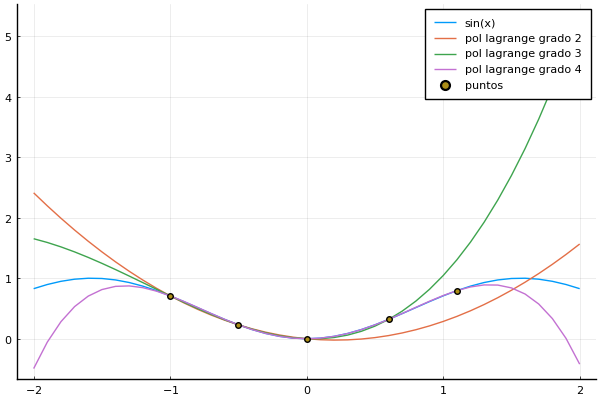

In [111]:
#ahora vamos a graficar
using Plots
pyplot()
n = length(coef)-1
pol_lag(t) = sum([coef[i+1]*t^i for i in 0:n]) #calculamos los polinomios de lagrange
pol_lag2(t) = sum([coef2[i+1]*t^i for i in 0:n+1])
pol_lag3(t) = sum([coef3[i+1]*t^i for i in 0:n+2])

t = -2:0.1:2
plot(t,f.(t), label = "sin(x)")
plot!(t,pol_lag.(t),label = "pol lagrange grado 2")
plot!(t,pol_lag2.(t),label = "pol lagrange grado 3")
plot!(t,pol_lag3.(t),label = "pol lagrange grado 4")
scatter!(z,f.(z),label= "puntos")

17. **Dificultad media**. Haz una función que dados los coeficientes de un polinomio de grado $n$, calcule los coeficientes de su integral (hay un coeficiente que será arbitrario y se puede poner en 1) (similar, se puede hacer una de su derivada). 

Con esta función y la función del ejercicio anterior, haz una función que dada una función $f$, un entero $n$ y dos reales $a$ y $b$, calcule primero el polinomio de Lagrange con puntos separados equidistantemente en el eje $x$, después el polinomio de Lagrange de la integral y finalmente evalue este polinomio en $b$ y le reste el polinomio evaluado en $a$. 

Compara (en tiempo de integración y en calidad) lo que obtengas con lo que se obtiene vía la regla de Simpson para un par de funciones no polinomiales.

In [115]:
"""
la siguiente función, calcula los coeficientes de la integral de un polimio, 
dados los coeficientes de este polinomio en forma de arreglo.
Si p(x) = a₀ + a₁x + a₂x^2 + ... + aₙx^n entonces el arreglo es [a₀,a₁,a₂,...,aₙ] 
Nota: en el término independiente del polinomio integrado regresa un 0
"""
function int_polinomio(coef::Array{Float64,1})
    coeficientes_int = append!([0.0],[coef[i]/(i) for i in 1:length(coef)])
    return coeficientes_int
end 

int_polinomio

In [116]:
#probamos que funcione bien
# dado el polinomio 3x^4 - 2x^3 + 8x^2- x + 1
# sus coeficientes son [1,-1,8,-2,3]
# su integral es 3/5 x^5 - 2/4 x^4 + 8/3 x^3 - 1/2 x^2 + x + Cte
# loscoeficientes de su integral deben ser [Cte,1,-1/2,8/3,-2/4,3/5]
int_polinomio([1.0,-1.0,8.0,-2.0,3.0])

6-element Array{Float64,1}:
  0.0
  1.0
 -0.5
  2.6666666666666665
 -0.5
  0.6

In [117]:
#### Esta es la función que pide el problema ######

function integral_lagrange(f,n::Int64,a::Real,b::Real)
    ### Primero generamos un arreglo de n+1 puntos equiditantes entre a y b
    Δx = (b-a)/n
    x = [a+Δx*i for i in 0:n]
    ##calculamos el polinomio de lagrange 
    coef = pol_lagrange_coef(f,x)
    #pol_lag(t) = sum([coef[i+1]*t^i for i in 0:n]) #esta linea está comentada porque calcular el polinomio 
                                                    #no es necesario para lo que se quiere de resultado final
                                                    #solo cenecesitan  
    ###Calculamos los coeficientes de su integral
    coef_int = int_polinomio(coef)
    ###Calculamos la integral del polinomio de lagrange
    k = length(coef)
    int_pol_lag(t) = sum([coef_int[i+1]*t^i for i in 0:k])
    
    return int_pol_lag(b)-int_pol_lag(a)
end     

integral_lagrange (generic function with 1 method)

In [145]:
#veamos si funciona
f(x) = cos(x)
a = -1.0
b = 1.0
n = 10 #lo probaremos con 10 + 1 puntos, 
       #(n es el número de subintervalos y el grado del polinomio de lagrange que lo aproxima)

t1 = @belapsed integral_lagrange(f,n,a,b) 
println("tiempo = ",t1, " s")
lag = integral_lagrange(f,n,a,b) #lo probaremos con 10+1 puntos
println("valor de la integral = ",lag)
error_lag = (sin(1)-sin(-1))-lag
println("error = ", error_lag)

tiempo = 0.015859036 s
valor de la integral = 1.6829419696053654
error = 1.042765873648932e-11


In [146]:
#comparano con regla de simpson
t2 = @belapsed s∫(f,a,b) 
println("tiempo = ",t2," s")
simp = s∫(f,a,b) #por default tiene 500 puntos
println("valor de la integral = ",simp)
error_simp = (sin(1)-sin(-1))-simp
println("error = ", error_simp)

tiempo = 9.426e-6 s
valor de la integral = 1.6829419696159424
error = -1.4943601911454607e-13


In [147]:
### probamos ahora con una función exponencial 
f(x) = exp(x)
a = -1.0
b = 1.0
n = 10

t1 = @belapsed integral_lagrange(f,n,a,b) 
println("tiempo = ",t1, " s")
lag = integral_lagrange(f,n,a,b) #lo probaremos con 10+1 puntos
println("valor de la integral = ",lag)
error_lag = (exp(1)-exp(-1))-lag
println("error = ", error_lag)

tiempo = 0.015745976 s
valor de la integral = 2.350402387282231
error = 5.3717030823463574e-12


In [148]:
#comparano con regla de simpson
t2 = @belapsed s∫(f,a,b) 
println("tiempo = ",t2," s")
simp = s∫(f,a,b) #por default tiene 500 puntos
println("valor de la integral = ",simp)
error_simp = (exp(1)-exp(-1))-simp
println("error del valor real = ", error_simp)

tiempo = 1.0334e-5 s
valor de la integral = 2.350402387287812
error del valor real = -2.091660178393795e-13


En general notamos que la fórmula de simpson con 500 puntos es más precisa y más rápida que usar la interpolación de lagrange con 11 puntos.

Vamos a hace aquí las cuentas feas 


In [1]:
using LinearAlgebra
using SymPy